# 라이브러리 호출

In [24]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
%matplotlib in line

from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result.resid, axis = 0)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

UsageError: unrecognized arguments: line


# 체질 검사 파일 읽기

In [127]:
df_raw = pd.read_csv(os.getcwd()+'/3. Big Data 분석_실습화일/체질검사.csv',engine='python',encoding='euc-kr')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


# BMI 파생변수 생성
### BMI = 몸무게/신장^2

In [128]:
BMI_tmp = []
for i in range(len(df_raw)):
    weight = df_raw['WEIGHT'][i]*0.45
    height = df_raw['HEIGHT'][i]*0.0254
    BMI_tmp.append((weight/(height)**2).round(2))
df_raw['BMI'] = BMI_tmp

# 기초 통계량 확인
BMI의 수치가 비정상 적으로 높은 수치가 확인 되어 삭제 처리 요망  
BMI의 표준편차가 3시그마를 넘어가는 관측치 2개를 제거 할 예정 

In [129]:
df_raw.describe()


,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762,25.736984
std,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585,9.482886
min,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000,17.870000
25%,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000,22.850000
50%,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000,24.895000
75%,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000,27.117500
max,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000,164.310000


# BMI의 수치가 비정상적으로 높은 인자 제외
키 74.93cm 몸무게 110kg 이라는 이상치를 제외 했다.  
키 183.51cm 몸무게 163.41kg이라는 이상치를 제외 했다.

In [130]:
df_raw[df_raw["BMI"]>48]


,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.52
78,32.9,44,205.00,29.50,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4,164.31


In [131]:
df_raw = df_raw[df_raw['BMI']<48]

# 결측치 확인
결측치 없음.

In [132]:
df_raw.isnull().sum()

FAT        0
AGE        0
WEIGHT     0
HEIGHT     0
NECK       0
CHEST      0
ABDOMEN    0
HIP        0
THIGH      0
KNEE       0
ANKLE      0
BICEPS     0
FOREARM    0
WRIST      0
BMI        0
dtype: int64

# 종속변수 FAT에 대한 분포 확인

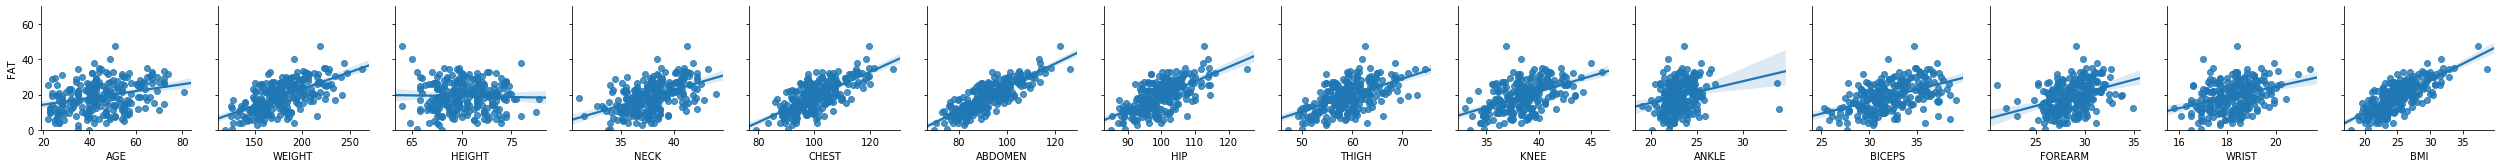

In [133]:

g = sns.pairplot(df_raw,y_vars = 'FAT', x_vars = [ 'AGE', 'WEIGHT', 'HEIGHT', 'NECK', 'CHEST', 'ABDOMEN', 'HIP',
       'THIGH', 'KNEE', 'ANKLE', 'BICEPS', 'FOREARM', 'WRIST', 'BMI'],kind = 'reg')
g.set(ylim=(0, 70))


# 각 변수별 상관계수 확인
히트맵과 dataframe으로 확인

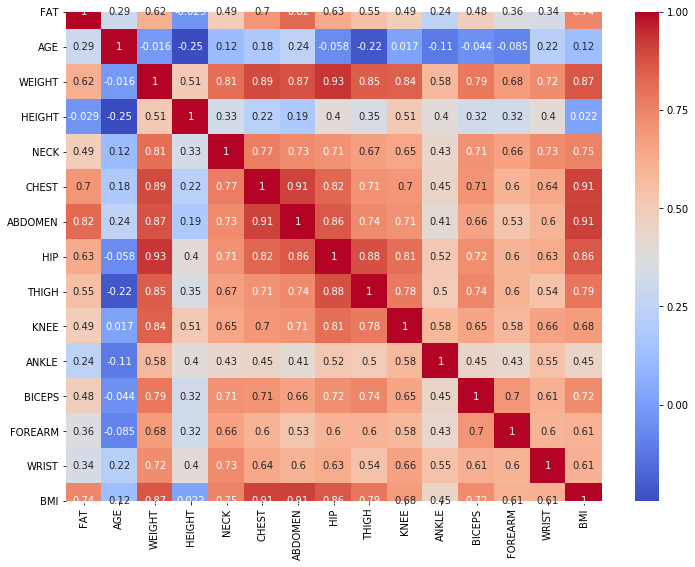

In [134]:
df_raw.corr().round(3)
plt.figure(figsize=(12,9))
sns.heatmap(df_raw.corr().round(3), annot=True, cmap='coolwarm')

In [135]:
df_raw.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
FAT,1.000,0.295,0.617,-0.029,0.489,0.701,0.824,0.633,0.549,0.492,0.245,0.482,0.365,0.339,0.745
AGE,0.295,1.000,-0.016,-0.246,0.119,0.182,0.243,-0.058,-0.216,0.017,-0.110,-0.044,-0.085,0.218,0.124
WEIGHT,0.617,-0.016,1.000,0.513,0.810,0.891,0.874,0.933,0.852,0.843,0.581,0.785,0.683,0.725,0.867
HEIGHT,-0.029,-0.246,0.513,1.000,0.325,0.224,0.187,0.397,0.350,0.513,0.395,0.319,0.322,0.397,0.022
NECK,0.489,0.119,0.810,0.325,1.000,0.769,0.728,0.708,0.669,0.648,0.434,0.709,0.661,0.731,0.752
CHEST,0.701,0.182,0.891,0.224,0.769,1.000,0.910,0.825,0.708,0.698,0.447,0.707,0.599,0.644,0.911
ABDOMEN,0.824,0.243,0.874,0.187,0.728,0.910,1.000,0.861,0.737,0.710,0.407,0.656,0.530,0.602,0.914
HIP,0.633,-0.058,0.933,0.397,0.708,0.825,0.861,1.000,0.881,0.809,0.521,0.722,0.603,0.626,0.861
THIGH,0.549,-0.216,0.852,0.350,0.669,0.708,0.737,0.881,1.000,0.777,0.504,0.744,0.604,0.544,0.787
KNEE,0.492,0.017,0.843,0.513,0.648,0.698,0.710,0.809,0.777,1.000,0.585,0.654,0.579,0.656,0.679


# 모든 독립변수를 종속변수의 회귀식에 적합하게 회귀분석 실시

In [136]:
reg_model = smf.ols(formula = "FAT ~ AGE+ WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE+ANKLE+BICEPS + FOREARM + WRIST+BMI", data = df_raw)

#적합 
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     51.84
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           1.14e-63
Time:                        19:05:50   Log-Likelihood:                -707.10
No. Observations:                 250   AIC:                             1444.
Df Residuals:                     235   BIC:                             1497.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -107.5876     55.406     -1.942      0.0

# 독립변수간 다중 공선성 확인
키, 몸무게, BMI에서 높은 다중공선성을 확인하여 후진 제거법을 이용하여 변수를 선택 하겠다.

In [179]:
#설명 변수 간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_raw_x = df_raw.drop(['FAT'],axis = 1)
#statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)
#DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values , i) for i in range(df_raw_x_const.shape[1])]
#vif 정렬
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)


,variable,VIF
10,ANKLE,1.829
1,AGE,2.290
12,FOREARM,2.449
13,WRIST,3.273
11,BICEPS,3.411
4,NECK,3.979
9,KNEE,4.537
8,THIGH,7.170
5,CHEST,10.956
6,ABDOMEN,12.346


# 후진 제거법을 이용하여 변수 선택
 5개 이상의 변수를 선택 할 시에 BMI에서 200을 넘는 다중 공선성을 확인 했기 때문에 4개의 변수를 선택하여 다중공선성을 10이하로 유지 시킨다.

In [182]:
df_raw_y= df_raw["FAT"]

model = LinearRegression()
rfe = RFE(estimator = model , n_features_to_select=4).fit(df_raw_x,df_raw_y)
selected_cols = df_raw_x.columns[rfe.support_]
removed_cols = df_raw_x.columns[~rfe.support_]

print("selected Variables: {}" .format(selected_cols))
print("selected Variables: {}" .format(removed_cols))

selected Variables: Index(['HEIGHT', 'ABDOMEN', 'WRIST', 'BMI'], dtype='object')
selected Variables: Index(['AGE', 'WEIGHT', 'NECK', 'CHEST', 'HIP', 'THIGH', 'KNEE', 'ANKLE',
       'BICEPS', 'FOREARM'],
      dtype='object')


In [183]:
df_raw_x_rfe = df_raw_x[selected_cols]
df_raw_x_rfe_const = add_constant(df_raw_x_rfe)
#다중 공선성 저장
df_rfe_vif = pd.DataFrame()
df_rfe_vif['variable'] = df_raw_x_rfe_const.columns
df_rfe_vif['VIF'] = [variance_inflation_factor(df_raw_x_rfe_const.values,i) for i in range(df_raw_x_rfe_const.shape[1])]
df_rfe_vif.sort_values("VIF", inplace = True)
df_rfe_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
1,HEIGHT,1.561
3,WRIST,2.117
2,ABDOMEN,7.359
4,BMI,8.257
0,const,860.213


# 적합된 회귀 모형 확인
회귀 계수의 P값 모두 0.05보다 작아서 회귀계수들이 유의 한 것을 알 수 있었다.  
그러므로 회귀식은 최종으로 FAT = 9.8232 + -0.5169*HEIGHT + 0.8719*ABDOMEN + -1.4562*WRIST + -0.3341*BMI 이라는 식을 얻을 수 있었다.   
그리고 회귀식의 F통계량인 P값이 0.05보다 낮은 것을 확인하여 회귀식이 유의한것을 알 수있었습니다.  
최종적으로 만든 회귀식의 수정된 설명력은 0.730으로 높은 수준의 설명력을 가지는 것을 알 수 있다.


In [184]:
rfe_reg_model = smf.ols(formula = "FAT ~ HEIGHT+ ABDOMEN + WRIST+ BMI", data = df_raw)
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     169.5
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           2.44e-69
Time:                        19:31:06   Log-Likelihood:                -717.30
No. Observations:                 250   AIC:                             1445.
Df Residuals:                     245   BIC:                             1462.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.8232      7.990      1.229      0.2

# 변수 중요도 확인
중요도는 회귀계수의 절대값 크기이다.  
손목 두께(WRIST)가 얇을 수록  
BMI 수치가 작을수록  
복부 둘레(ABDOMEN)가 커질수록  
키(HEIGHT)는 작을수록  
체질 비만도(FAT)이 높다.  

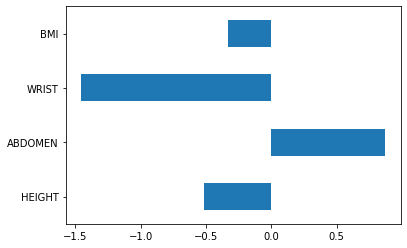

In [144]:
df_reg_coef = pd.DataFrame({"Coef": rfe_reg_result.params.values[1:]}, index = selected_cols)
df_reg_coef.plot.barh(y="Coef", legend = False)

# 잔차 분석
## 정규성 검정
p값이 0.05보다 작기 때문에 귀무 가설을 기각한다.  
결과적으로 잔차는 정규성을 띈다고 할 수 없다. 

(0.9885058999061584, 0.04371830075979233)

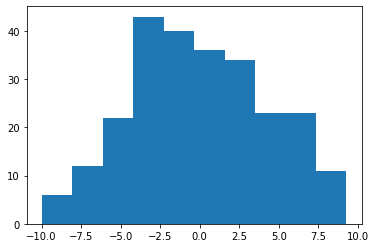

In [151]:
from scipy.stats import shapiro
#정규성 검정
plt.hist(rfe_reg_result.resid)
shapiro(rfe_reg_result.resid)

## 등분산성 확인
등분산성을 띄는 것을 볼 수 있었다.

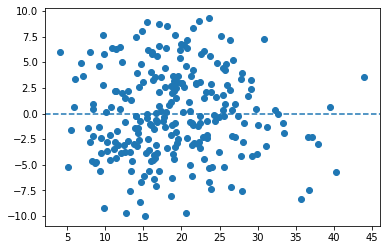

In [146]:
#둥분산성 검정
plt.scatter(rfe_reg_result.fittedvalues, rfe_reg_result.resid)
plt.axhline(y=0,linestyle='--')

## 독립성 검정
어떠한 패턴을 가지지 않으며 독립적으로 잔차가 분포한것을 볼 수 있다.
그러므로 독립성을 가진다고 할 수 있다.

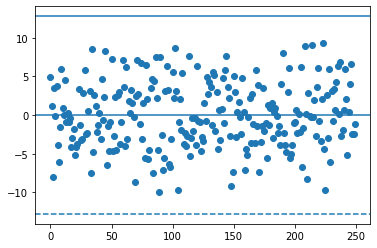

In [150]:
#독립성 검정
plt.scatter(range(0,250),rfe_reg_result.resid ,marker="o")
plt.axhline(y=0, linestyle ='-')
plt.axhline(y=3*np.std(rfe_reg_result.resid), linestyle ='-')
plt.axhline(y=-3*np.std(rfe_reg_result.resid), linestyle ='--')